<a href="https://colab.research.google.com/github/Amarsinh0/MY-NOTES/blob/main/MY_notes_k_m_ML_PART_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
df=pd.read_csv("/content/insurance.csv")

In [ ]:
df.head()

# **corrcoef**

In [ ]:
height=[160,162,165,168,170,174]
weight=[60,61,64,75,65,67]
print(np.corrcoef(height,weight))

[[1.         0.58433458]
 [0.58433458 1.        ]]


In [ ]:
print(np.corrcoef(height,weight)[0][1])

0.5843345794213614


In [ ]:
df=pd.read_csv("/content/insurance.csv")

In [ ]:
df.charges.corr(df.bmi)

0.19834096883362895

### **find value of person correlation (r) and probability value (p)**

---
**person corelation(r)**..1) how much two numric variables influence each other
2)range from -1 to 1




In [ ]:
from scipy import stats

In [44]:
r,p=stats.pearsonr(df.charges,df.age)

In [47]:
print(r)

0.2990081933306476


In [48]:
print(p)

4.886693331718192e-29


In [ ]:
import pandas as pd 
import numpy as np
df=pd.read_csv("/content/insurance.csv")
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
corr_df=pd.DataFrame(columns=['r','p'])
for col in df:
  print(col)

age
sex
bmi
children
smoker
region
charges


In [49]:
corr_df=pd.DataFrame(columns=['r','p'])
for col in df:
  print(col)
  if pd.api.types.is_numeric_dtype(df[col])and col!='charges':
    r,p=stats.pearsonr(df.charges,df[col])
    corr_df.loc[col]=[round(r,3),round(p,3)]
corr_df

age
sex
bmi
children
smoker
region
charges


,r,p
age,0.299,0.000
bmi,0.198,0.000
children,0.068,0.013


In [50]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [51]:
import matplotlib.pyplot as plt


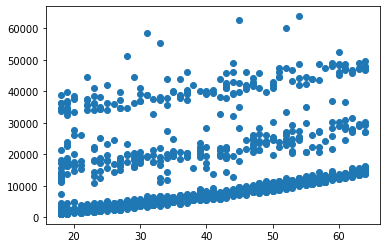

In [54]:
plt.scatter(df.age,df.charges)
plt.show()

In [60]:
df_smoker=df[df['smoker']=='yes']
df_nonsmoker=df[df['smoker']=='no']
df_smoker

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


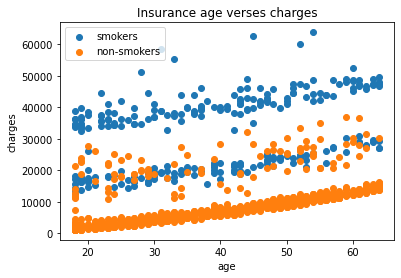

In [64]:
df_smoker=df[df['smoker']=='yes']  # save in  separate variabels:   'yes' as df_smoker and 'no' as df_nonsmoker
df_nonsmoker=df[df['smoker']=='no']

plt. scatter (df_smoker.age,df_smoker.charges,label='smokers')           #scatter plot of age vs charges of ..smoker
plt. scatter (df_nonsmoker.age,df_nonsmoker.charges,label='non-smokers') #scatter plot of age vs charges of.. nonsmoker

plt.title('Insurance age verses charges')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.show()

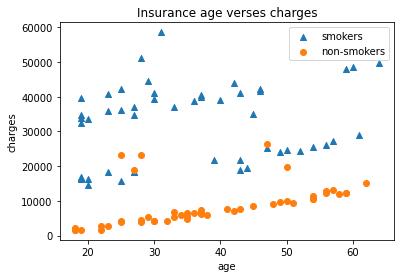

In [71]:
df_smoker_reduced=df_smoker.sample(50)    #  reduced sample size  to 50 for clear ploting
df_nonsmoker_reduced=df_nonsmoker.sample(50)

plt. scatter (df_smoker_reduced.age,df_smoker_reduced.charges,label='smokers',marker='^')  # only use '_reduced' as extra word before variables
plt. scatter (df_nonsmoker_reduced.age,df_nonsmoker_reduced.charges,label='non-smokers',marker='o')

plt.title('Insurance age verses charges')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.show()

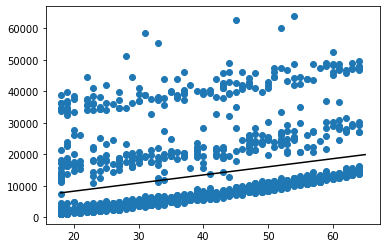

In [73]:
#y=mx+c
#y=slope(x)+intercept
m,c,r,p,err= stats.linregress(df.age,df.charges)
x=range(18,df.age.max()+2)
y=m*x+c
plt.plot(x,y,color='black')
plt.scatter(df.age,df.charges)
plt.show()